In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
titanic['sex']= np.where(titanic['sex']=='male',1,0)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,0,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,0,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,1,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
titanic['alive']= np.where(titanic['alive']=='yes',1,0)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,0,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,1,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,1,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,1,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,0,True
887,1,1,0,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,1,True
888,0,3,0,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,0,False
889,1,1,1,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,1,True


In [5]:
xdata = titanic.iloc[:,[2,6]]
ydata = titanic.iloc[:,[-2]]

In [6]:
IO = Dense(units=1, input_dim=2, activation='sigmoid') #sigmoid를 활성함수로 쓰겠다. 
model = Sequential( [IO] ) #순차모델
model.compile( loss='binary_crossentropy', optimizer=Adam(0.1),metrics=['accuracy'])  #loss는 로그 함수를 사용한다. 
h = model.fit( xdata, ydata, epochs=1000)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 891 samples
Epoch 1/1000
891/891 [==============================] - 0s 233us/sample - loss: 1.2738 - acc: 0.6004
Epoch 2/1000
891/891 [==============================] - 0s 57us/sample - loss: 0.5922 - acc: 0.6914
Epoch 3/1000
891/891 [==============================] - 0s 54us/sample - loss: 0.5456 - acc: 0.7677
Epoch 4/1000
891/891 [==============================] - 0s 60us/sample - loss: 0.5521 - acc: 0.7632
Epoch 5/1000
891/891 [==============================] - 0s 54us/sample - loss: 0.5616 - acc: 0.7666
Epoch 6/1000
891/891 [==============================] - 0s 59us/sample - loss: 0.9501 - acc: 0.7116
Epoch 7/1000
891/891 [==============================] - 0s 59us/sample - loss: 0.6196 - acc: 0.7744
Epoch 8/1000
891/891 [==============================] - 0s 50us/sample - loss: 0.5917 - acc: 0.7598
Epo

891/891 [==============================] - 0s 58us/sample - loss: 0.7159 - acc: 0.7363
Epoch 156/1000
891/891 [==============================] - 0s 57us/sample - loss: 0.6485 - acc: 0.7531
Epoch 157/1000
891/891 [==============================] - 0s 50us/sample - loss: 0.5117 - acc: 0.7755
Epoch 158/1000
891/891 [==============================] - 0s 57us/sample - loss: 0.5456 - acc: 0.7643
Epoch 159/1000
891/891 [==============================] - 0s 58us/sample - loss: 0.7656 - acc: 0.7262
Epoch 160/1000
891/891 [==============================] - 0s 52us/sample - loss: 0.7135 - acc: 0.7407
Epoch 161/1000
891/891 [==============================] - 0s 56us/sample - loss: 0.5638 - acc: 0.7778
Epoch 162/1000
891/891 [==============================] - 0s 56us/sample - loss: 0.5181 - acc: 0.7811
Epoch 163/1000
891/891 [==============================] - 0s 57us/sample - loss: 0.6415 - acc: 0.7576
Epoch 164/1000
891/891 [==============================] - 0s 56us/sample - loss: 0.5434 - acc: 0.

891/891 [==============================] - 0s 53us/sample - loss: 0.6569 - acc: 0.7643
Epoch 316/1000
891/891 [==============================] - 0s 54us/sample - loss: 0.5579 - acc: 0.7755
Epoch 317/1000
891/891 [==============================] - 0s 52us/sample - loss: 0.5222 - acc: 0.7868
Epoch 318/1000
891/891 [==============================] - 0s 55us/sample - loss: 0.5110 - acc: 0.7789
Epoch 319/1000
891/891 [==============================] - 0s 55us/sample - loss: 0.5718 - acc: 0.7677
Epoch 320/1000
891/891 [==============================] - 0s 57us/sample - loss: 0.8344 - acc: 0.7363
Epoch 321/1000
891/891 [==============================] - 0s 54us/sample - loss: 0.7306 - acc: 0.7407
Epoch 322/1000
891/891 [==============================] - 0s 52us/sample - loss: 0.5741 - acc: 0.7744
Epoch 323/1000
891/891 [==============================] - 0s 51us/sample - loss: 0.5980 - acc: 0.7565
Epoch 324/1000
891/891 [==============================] - 0s 73us/sample - loss: 0.7973 - acc: 0.

891/891 [==============================] - 0s 53us/sample - loss: 0.5614 - acc: 0.7643
Epoch 396/1000
891/891 [==============================] - 0s 55us/sample - loss: 0.5894 - acc: 0.7565
Epoch 397/1000
891/891 [==============================] - 0s 60us/sample - loss: 0.5716 - acc: 0.7677
Epoch 398/1000
891/891 [==============================] - 0s 54us/sample - loss: 0.7565 - acc: 0.7306
Epoch 399/1000
891/891 [==============================] - 0s 54us/sample - loss: 0.6054 - acc: 0.7643
Epoch 400/1000
891/891 [==============================] - 0s 57us/sample - loss: 0.5970 - acc: 0.7587
Epoch 401/1000
891/891 [==============================] - 0s 57us/sample - loss: 0.5565 - acc: 0.7587
Epoch 402/1000
891/891 [==============================] - 0s 53us/sample - loss: 0.5768 - acc: 0.7632
Epoch 403/1000
891/891 [==============================] - 0s 53us/sample - loss: 0.5930 - acc: 0.7486
Epoch 404/1000
891/891 [==============================] - 0s 56us/sample - loss: 0.6961 - acc: 0.

891/891 [==============================] - 0s 55us/sample - loss: 0.5410 - acc: 0.7789
Epoch 476/1000
891/891 [==============================] - 0s 56us/sample - loss: 0.6633 - acc: 0.7542
Epoch 477/1000
891/891 [==============================] - 0s 54us/sample - loss: 0.5862 - acc: 0.7632
Epoch 478/1000
891/891 [==============================] - 0s 53us/sample - loss: 0.5530 - acc: 0.7688
Epoch 479/1000
891/891 [==============================] - 0s 56us/sample - loss: 0.5305 - acc: 0.7654
Epoch 480/1000
891/891 [==============================] - 0s 49us/sample - loss: 0.7467 - acc: 0.7385
Epoch 481/1000
891/891 [==============================] - 0s 49us/sample - loss: 0.5837 - acc: 0.7789
Epoch 482/1000
891/891 [==============================] - 0s 53us/sample - loss: 0.7663 - acc: 0.7239
Epoch 483/1000
891/891 [==============================] - 0s 57us/sample - loss: 0.6804 - acc: 0.7486
Epoch 484/1000
891/891 [==============================] - 0s 59us/sample - loss: 0.9632 - acc: 0.

891/891 [==============================] - 0s 57us/sample - loss: 0.5667 - acc: 0.7531
Epoch 636/1000
891/891 [==============================] - 0s 54us/sample - loss: 0.5781 - acc: 0.7733
Epoch 637/1000
891/891 [==============================] - 0s 60us/sample - loss: 0.5448 - acc: 0.7744
Epoch 638/1000
891/891 [==============================] - 0s 62us/sample - loss: 0.6810 - acc: 0.7475
Epoch 639/1000
891/891 [==============================] - 0s 57us/sample - loss: 0.5343 - acc: 0.7767
Epoch 640/1000
891/891 [==============================] - 0s 53us/sample - loss: 0.6849 - acc: 0.7464
Epoch 641/1000
891/891 [==============================] - 0s 56us/sample - loss: 0.5159 - acc: 0.7778
Epoch 642/1000
891/891 [==============================] - 0s 50us/sample - loss: 0.5162 - acc: 0.7767
Epoch 643/1000
891/891 [==============================] - 0s 66us/sample - loss: 0.5345 - acc: 0.7800
Epoch 644/1000
891/891 [==============================] - 0s 55us/sample - loss: 0.5551 - acc: 0.

891/891 [==============================] - 0s 50us/sample - loss: 0.5517 - acc: 0.7811
Epoch 716/1000
891/891 [==============================] - 0s 56us/sample - loss: 0.5943 - acc: 0.7621
Epoch 717/1000
891/891 [==============================] - 0s 50us/sample - loss: 0.6417 - acc: 0.7531
Epoch 718/1000
891/891 [==============================] - 0s 55us/sample - loss: 0.7265 - acc: 0.7284
Epoch 719/1000
891/891 [==============================] - 0s 51us/sample - loss: 0.5471 - acc: 0.7755
Epoch 720/1000
891/891 [==============================] - 0s 56us/sample - loss: 0.5737 - acc: 0.7688
Epoch 721/1000
891/891 [==============================] - 0s 56us/sample - loss: 0.6384 - acc: 0.7407
Epoch 722/1000
891/891 [==============================] - 0s 61us/sample - loss: 0.5302 - acc: 0.7755
Epoch 723/1000
891/891 [==============================] - 0s 58us/sample - loss: 0.5174 - acc: 0.7811
Epoch 724/1000
891/891 [==============================] - 0s 57us/sample - loss: 0.5370 - acc: 0.

891/891 [==============================] - 0s 50us/sample - loss: 0.5226 - acc: 0.7834
Epoch 876/1000
891/891 [==============================] - 0s 56us/sample - loss: 0.5552 - acc: 0.7688
Epoch 877/1000
891/891 [==============================] - 0s 52us/sample - loss: 0.6078 - acc: 0.7553
Epoch 878/1000
891/891 [==============================] - 0s 51us/sample - loss: 0.8004 - acc: 0.7228
Epoch 879/1000
891/891 [==============================] - 0s 53us/sample - loss: 0.7308 - acc: 0.7464
Epoch 880/1000
891/891 [==============================] - 0s 51us/sample - loss: 0.5269 - acc: 0.7744
Epoch 881/1000
891/891 [==============================] - 0s 52us/sample - loss: 0.5480 - acc: 0.7542
Epoch 882/1000
891/891 [==============================] - 0s 54us/sample - loss: 0.6470 - acc: 0.7464
Epoch 883/1000
891/891 [==============================] - 0s 56us/sample - loss: 0.5277 - acc: 0.7800
Epoch 884/1000
891/891 [==============================] - 0s 59us/sample - loss: 0.6377 - acc: 0.

In [7]:
model.predict(xdata)

array([[0.08832598],
       [0.7521395 ],
       [0.6220516 ],
       [0.7179827 ],
       [0.08894995],
       [0.08927   ],
       [0.1297164 ],
       [0.09968281],
       [0.62930703],
       [0.6708664 ],
       [0.6417568 ],
       [0.66331655],
       [0.08894995],
       [0.10887715],
       [0.6218909 ],
       [0.64020133],
       [0.1068792 ],
       [0.09290028],
       [0.6446376 ],
       [0.62046117],
       [0.10403278],
       [0.09290028],
       [0.62228817],
       [0.11289895],
       [0.6514099 ],
       [0.6736676 ],
       [0.08830652],
       [0.5337695 ],
       [0.62194765],
       [0.0888294 ],
       [0.1055918 ],
       [0.8625405 ],
       [0.6216543 ],
       [0.09088585],
       [0.16647619],
       [0.12986639],
       [0.08830976],
       [0.08894995],
       [0.6446376 ],
       [0.6295511 ],
       [0.6255639 ],
       [0.6512455 ],
       [0.0888294 ],
       [0.6949219 ],
       [0.62194765],
       [0.08894995],
       [0.09495458],
       [0.621

In [8]:
model.predict_classes(xdata)

array([[0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
    

In [9]:
IO.get_weights()

[array([[-2.8259962 ],
        [ 0.00965604]], dtype=float32),
 array([0.4217414], dtype=float32)]

In [10]:
model.predict( np.array( [[1,53]] ) )

array([[0.13096145]], dtype=float32)

In [11]:
h.history['acc'][-1]

0.7586981

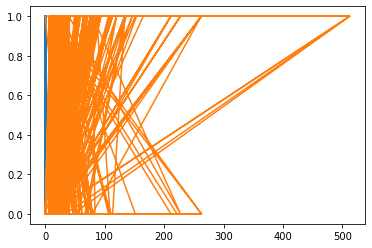

In [13]:
plt.plot(xdata,ydata)